In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from matplotlib import rc,rcParams
from pylab import *


In [2]:
print(f'curent directory:{os.getcwd()}')

curent directory:/home/quartermaine/Desktop/thesis


In [3]:
path = f'{os.getcwd()}/results_and_plots/15_1_2021/19_derivatives_aug/results.csv'

df = pd.read_csv(f'{path}')

In [4]:
######################################## Data preparation #########################################
X = df[['convLayers', 'nFilts', 'dropoutRate', 'denseNodes']] #.values.reshape(-1,4)
Y = df['accuracy']

print(X.shape)
print(Y.shape)


(108, 4)
(108,)


In [5]:
scaler = StandardScaler()

Xst = scaler.fit_transform(X)

Xst = pd.DataFrame(Xst)

Xst.columns = X.columns


In [6]:
# ols = linear_model.LinearRegression()
ols  = DecisionTreeRegressor()
model = ols.fit(Xst, Y)
response = model.predict(Xst)


In [7]:
r2 = model.score(Xst, Y)
print(r2)


1.0


In [8]:
# importance = model.coef_
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.55731
Feature: 1, Score: 0.11917
Feature: 2, Score: 0.12177
Feature: 3, Score: 0.20175


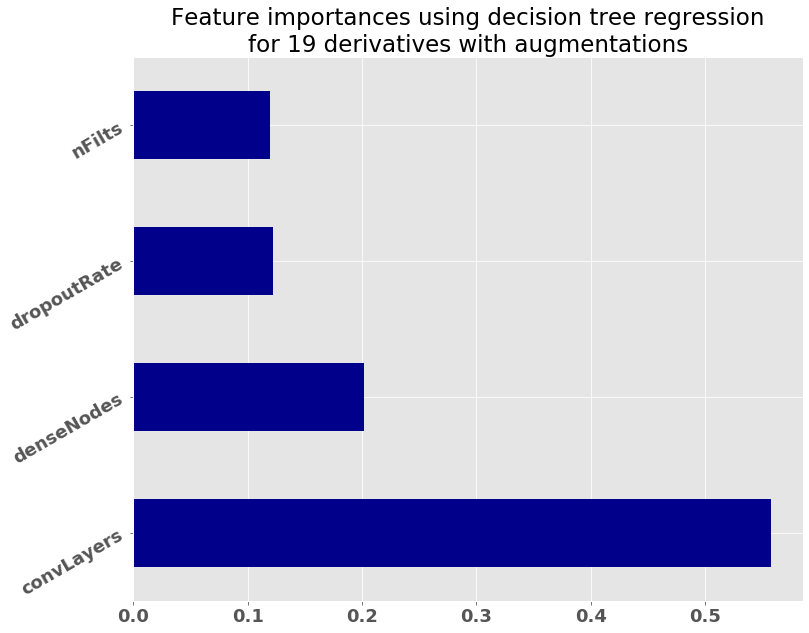

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
rc('font', weight='heavy')

(pd.Series(importance, index=X.columns)).nlargest(4).plot(kind='barh',
                                                         fontsize=18, 
                                                          rot=30,
                                                          color="darkblue",
                                              
                                                         )
plt.title(label = "Feature importances using decision tree regression\nfor 19 derivatives with augmentations",
         size = 23)

# (pd.Series(model.feature_importances_, index=X.columns)).nlargest(4).plot(kind='barh')
name = 'feature_importances'
plt.savefig(name)


In [10]:
import seaborn as sns

sns.set_theme(context='paper', style="darkgrid")


plt.rcParams["axes.labelsize"] = 25

s = pd.DataFrame([importance, X.columns]).T

s.columns = ['importance', 'hyperparameter']

s

,importance,hyperparameter
0,0.557312,convLayers
1,0.11917,nFilts
2,0.121767,dropoutRate
3,0.201751,denseNodes


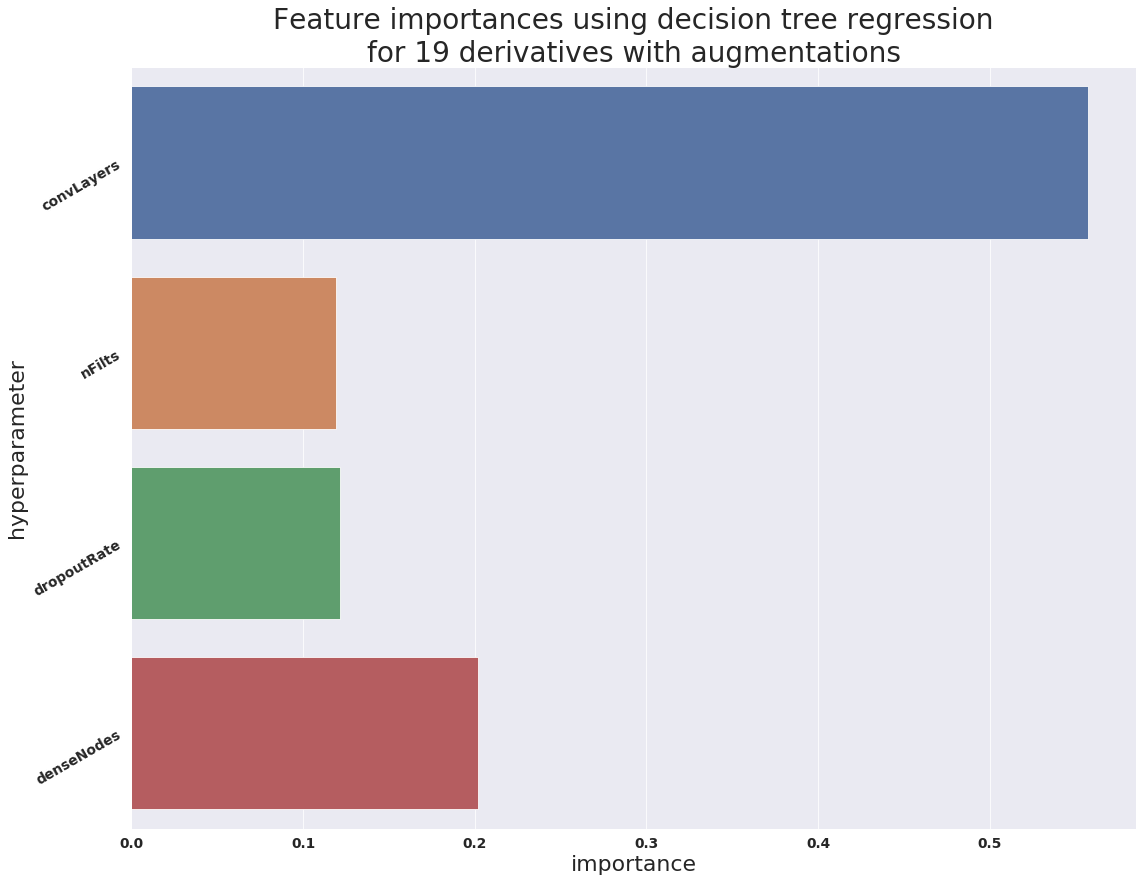

In [11]:
title_plot = 'Feature importances using decision tree regression\nfor 19 derivatives with augmentations'

fig, ax = plt.subplots(figsize = ( 18 , 14 )) 

ax.yaxis.set_tick_params(labelsize='x-large', rotation=30)

ax.xaxis.set_tick_params(labelsize='x-large')

# Plot the scatterplot 
ax = sns.barplot(x="importance", y="hyperparameter", data=s)
  
# Set label for x-axis 
ax.set_xlabel( "importance" , size = 22 ) 
  
# Set label for y-axis 
ax.set_ylabel( "hyperparameter" , size = 22 ) 
  
# Set title for plot 
ax.set_title( title_plot , size = 28 ) 

name = 'feature_importances_19_derivatives_aug'
plt.savefig(name)

# Display figure 
plt.show() 
